In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)
print("Sample data:\n", data.head())
print("\nMissing values:\n", data.isnull().sum())

Sample data:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


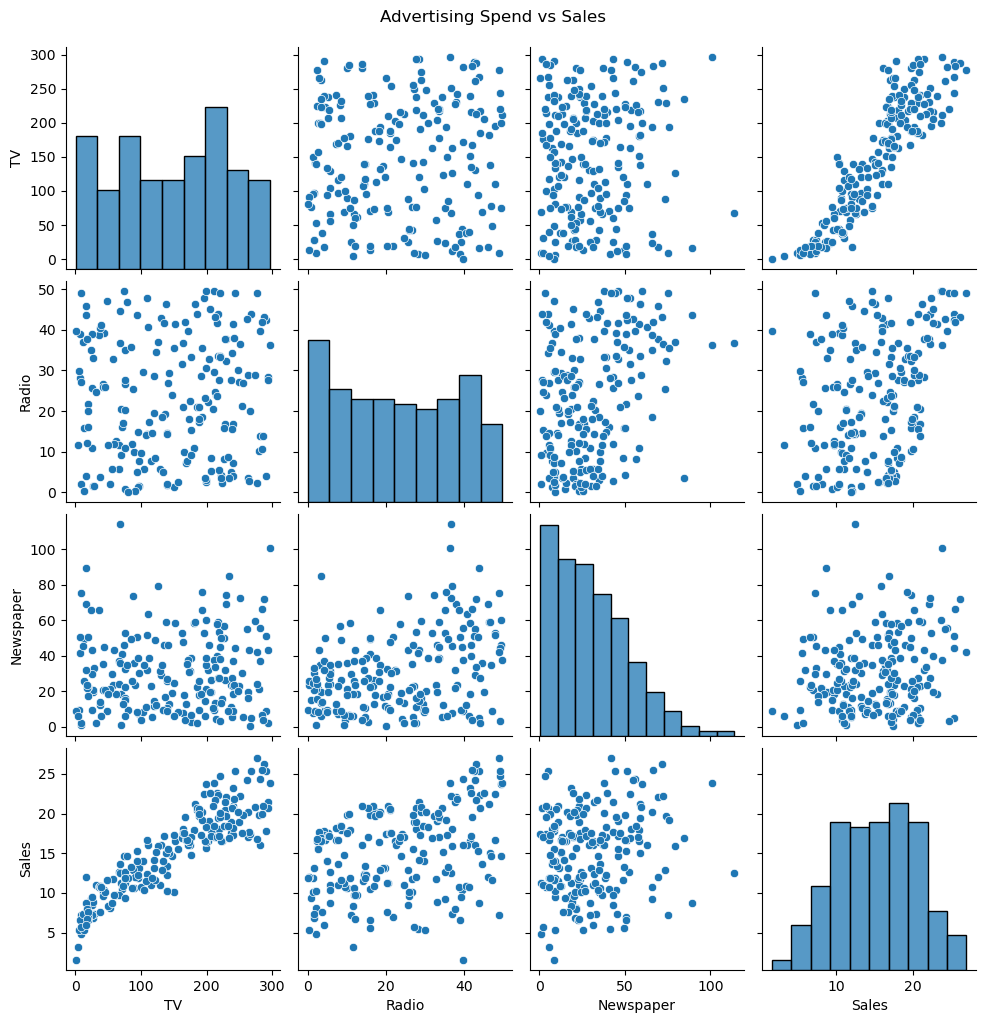

In [4]:
sns.pairplot(data)
plt.suptitle('Advertising Spend vs Sales', y=1.02)
plt.show()

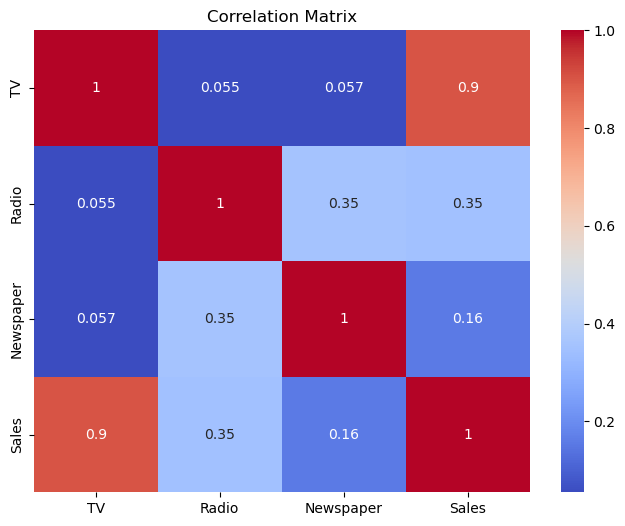

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']  # Target

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Model Coefficients: [4.66813753 1.49496505 0.09420978]
Intercept: 15.210200677006172
Mean Squared Error: 2.9077569102710923
R^2 Score: 0.9059011844150826


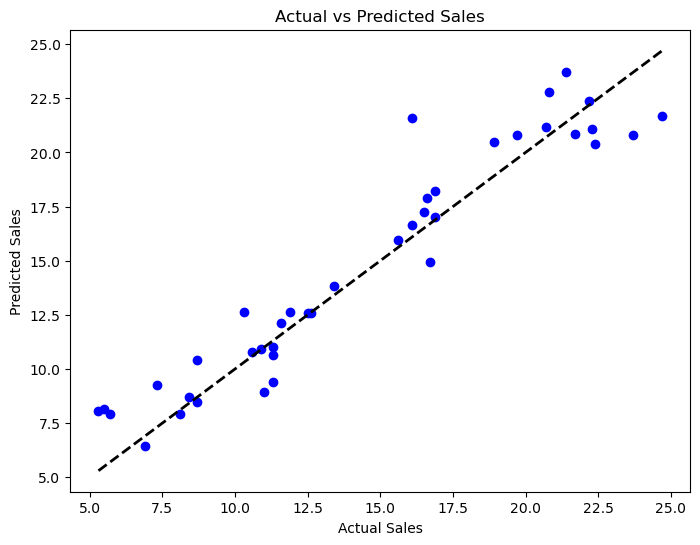

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [13]:
new_data = np.array([[150, 25, 10]])
new_data_scaled = scaler.transform(new_data)
predicted_sales = model.predict(new_data_scaled)
print("\nPredicted Sales for input [150, 25, 10]:", predicted_sales[0])


Predicted Sales for input [150, 25, 10]: 15.457517555841333


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
